<h1><center>IPL Data Analysis</center></h1>

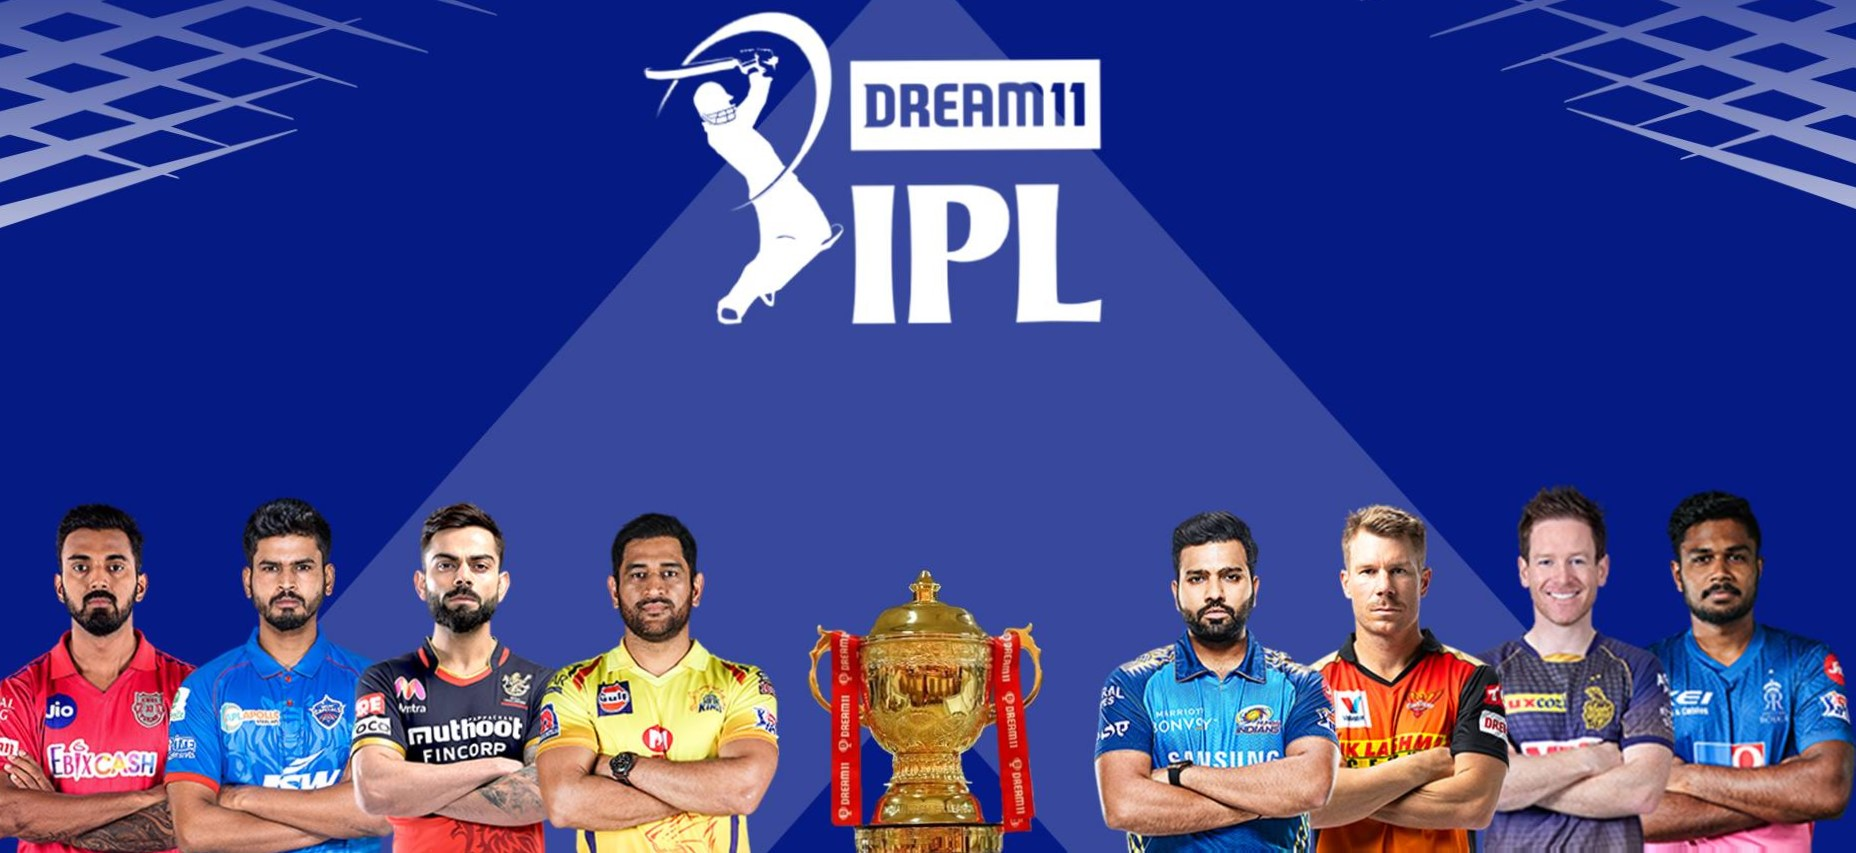



#### Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
output_notebook()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Load the Dataset

In [ ]:
matches = pd.read_csv('../input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv')
deliveries = pd.read_csv('../input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv')


## Exploratory Data Analysis

In [ ]:
matches.head()

In [ ]:
deliveries.head()

In [ ]:
matches.info()

In [ ]:
# Unique Cities
matches['city'].unique()

In [ ]:
# Replace Bangalore to Bengaluru
matches.replace('Bangalore','Bengaluru',inplace = True)

matches['city'].unique()


In [ ]:
# Unique Winners
matches['winner'].unique()

In [ ]:
# replace  Delhi Daredevils to Delhi capitals and use Abbreviation team name

Team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala',
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals']

Abbr = ['KKR','CSK','DC','RCB','RR','KXIP','DC','MI','PW','KTK','SRH','RPS','GL','RPS','DC']

matches.replace(Team, Abbr,inplace = True)

In [ ]:
matches['winner'].unique()

In [ ]:
matches['venue'].unique()

In [ ]:
# replace venue names for consistency

matches.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                     'M.Chinnaswamy Stadium':'M. Chinnaswamy Stadium',              
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},inplace=True)

In [ ]:
matches['venue'].unique()

#### Handling Missing Values

In [ ]:
matches.isna().sum()

In [ ]:
matches.drop('method',axis =1,inplace = True)

In [ ]:
# replace winner, result and result margin missing values with no-result
#matches[['winner','result_margin','result']].fillna('No-Result',inplace = True)
matches['eliminator'].fillna('mode',inplace = True)
matches['winner'].fillna('No-Result',inplace = True)
matches['result_margin'].fillna('No-Result',inplace = True)
matches['result'].fillna('No-Result',inplace = True)
matches['player_of_match'].fillna('No-Result',inplace = True)
matches['city'].fillna('Unknown',inplace = True)



In [ ]:
matches.isna().sum()

#### Create a new column Season

In [ ]:
matches['date'] = pd.to_datetime(matches['date'])
matches['season'] = matches['date'].dt.year

matches.head()

#### Combine Both DataFrame

In [ ]:
IplData = matches[['id','season','date']].merge(deliveries, left_on = 'id',right_on = 'id',how = 'left')
IplData.head()

## Visualization

### Teams Data Visualization

#### Total Matches won by each team

In [ ]:
winners = matches.groupby('winner').count().reset_index()
Team = list(winners['winner'])
TotalWin = list(winners['id'])

SortedTeam = sorted(Team,key = lambda x: TotalWin[Team.index(x)])
p = figure(x_range=SortedTeam, plot_height=450, title="Total Wins",
           toolbar_location=None, tools="")

p.vbar(x=Team, top=TotalWin, width=0.8)
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

#### Team with maximum no. of tosses win?

In [ ]:
toss_winner = matches['toss_winner'].value_counts().reset_index()
toss_winner
sns.set(rc={'figure.figsize':(15,8)})


ax = plt.axes()
ax.set(facecolor = 'lightblue')
plt.title(' Number Of Tosses Win By Team',fontsize = 20)
sns.barplot(y = toss_winner['index'] ,x = toss_winner['toss_winner'],orient = 'h',palette = 'cubehelix')
plt.xlabel('Total Toss Wins')
plt.ylabel('Teams')
plt.show()


#### Top 10 players with most IPL career matches

In [ ]:
df= IplData.groupby(['batsman'])['id'].nunique().sort_values(ascending = False)[:10]

fig = px.bar(x = df.index, y =df.values,color = df.index,orientation="v",text = df.values)

fig.update_layout(
    height=500,
    width =800,
    title_text='Most Matches in IPL Career(Top 10)',
    xaxis =dict(title = 'Player'),
    yaxis = dict(title = 'Total Matches'),
    showlegend = False,
    uniformtext_minsize=14
    
   )
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=14,uniformtext_mode='hide')
fig.show()



#### Team decision after winning the toss

In [ ]:
toss_decision = matches.groupby('toss_decision').count().reset_index()
TossDecision = list(toss_decision['toss_decision'])
TotalWin = list(toss_decision['id'])

p = figure(x_range=TossDecision, plot_height=450, title="Bat Or Field After Toss Win",
           toolbar_location=None, tools="")

p.vbar(x=TossDecision, top=TotalWin, width=0.4)
p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)


#### Team decision after winning the toss across Seasons

In [ ]:
plt.figure(figsize = (15,10))
ax = plt.axes()
ax.set(facecolor = 'magenta')
ax.grid(False)
sns.countplot(data = matches,x = 'season',hue = 'toss_decision',palette = 'bone_r',linewidth=5)
plt.xticks(rotation  = 90)
plt.title('Toss decisions by season',fontsize = 20)
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

#### Venues that hosted maximum number of matches (Top 10)

In [ ]:
plt.figure(figsize = (12,10))
ax = plt.axes()
ax.set(facecolor = 'magenta')
ax.grid(False)
ax = sns.countplot(data =matches, x = 'venue', order = matches['venue'].value_counts().index[0:10], palette = 'gnuplot',linewidth=5)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')

plt.xlabel('Venues',fontsize = 15)
plt.ylabel('Total Wins',fontsize = 15)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Top 10 host venues',fontsize = 20)
plt.show()



#### Most successful Team in IPL

In [ ]:
final = matches.groupby('season').tail(1)
final['winner'].value_counts()

plt.figure(figsize=(10,8))
ax = plt.axes()
ax.set(facecolor = 'grey')
ax.grid(False)


sns.countplot(x=final['winner'],order = final['winner'].value_counts().index, linewidth = 5, palette = 'gist_ncar')
plt.title("IPL Champions",fontsize=20)
plt.xlabel('Teams',fontsize=20)
plt.ylabel('No.of Trophy',fontsize=20)
plt.xticks(rotation='60')
plt.show()


#### Total matches played each season

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(matches['season'],palette = 'magma')
plt.xticks(rotation = 45,fontsize = 10)
plt.yticks(fontsize =10)
plt.title('Total Number of Matches Played Each Season',fontsize = 20)
plt.ylabel('Total Matches')
plt.xlabel('Season')
plt.show()


#### Total runs scored in each season

In [ ]:
Total_runs_each_season = IplData.groupby('season')['total_runs'].sum().reset_index('season')
runs = Total_runs_each_season.set_index('season')


plt.figure(figsize = (20,8))
ax = plt.axes()
ax.set(facecolor = 'lavender')
ax.grid(False)
sns.lineplot(data = runs, x = runs.index , y = 'total_runs',marker = 'o',color = 'red', linewidth =3.5, palette = 'CMRmap')
plt.title('Total Runs Scored Each Season',fontsize = 20)
plt.xlabel('Season')
plt.ylabel('Runs')
plt.show()

#### Average runs scored per match per season

In [ ]:
Total_match_each_season = matches.groupby('season')['id'].count().reset_index().set_index('season')
Total_runs_per_season = pd.concat([Total_match_each_season,runs],axis = 1)
Total_runs_per_season['avg_runs'] = Total_runs_per_season['total_runs']/Total_runs_per_season['id']



plt.figure(figsize = (20,8))
ax = plt.axes()
ax.set(facecolor= 'lightgrey')
rc = {'lines.linewidth': 1, 'lines.markersize': 6}                  
ax.grid(False)
sns.set_context("poster", rc = rc)
plt.title('Average Runs Per Match By Season', fontsize = 20)
plt.xlabel('Season')
plt.ylabel('Avg Runs')
ax = sns.lineplot(data = Total_runs_per_season['avg_runs'], marker = 'o',color = 'red', linewidth = 3.5 )
plt.show()


#### Top 5 Stadiums for winning games batting second

In [ ]:
bat_second = matches.venue[matches['result'] != 'runs'].value_counts()[0:5].reset_index()
plt.figure(figsize = (10,8))
ax = plt.axes()
ax.grid(False)
ax.set(facecolor = 'lightblue')
ax = sns.barplot(data =bat_second, x = 'venue', y = 'index', palette = 'seismic',linewidth=5)
plt.title('Top 5 venues to win games batting second')
plt.xlabel('Total Wins')
plt.ylabel('Venues')
plt.show()

#### Top 5 Stadiums for winning games batting first

In [ ]:
bat_first = matches.venue[matches['result'] != 'wickets'].value_counts()[0:5].reset_index()
bat_first

plt.figure(figsize = (10,8))
ax = plt.axes()
ax.grid(False)
ax.set(facecolor = 'grey')
ax = sns.barplot(data =bat_first, x = 'venue', y = 'index',linewidth=5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 5 venues to win games batting first')
plt.xlabel('Total Wins')
plt.ylabel('Venues')
plt.show()

#### Total no. of sixes by season

In [ ]:
df = IplData[IplData['batsman_runs'] == 6]
sixes_by_season = df.groupby('season')['batsman_runs'].count().reset_index()


plt.figure(figsize = (12,10))
ax = plt.axes()
ax.grid(False)
ax.set(facecolor = 'grey')
ax = sns.barplot(data =sixes_by_season, x = 'season', y= 'batsman_runs',linewidth=3,color = '#007b7f')

for index, row in sixes_by_season.iterrows():
    ax.text(row.name,row.batsman_runs, row.batsman_runs, color='purple', ha="center",size = 20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total sixes by season')
plt.xlabel('Season')
plt.ylabel('Total Sixes')


plt.show()

#### Total runs scored by team each season

In [ ]:
total_runs = IplData.groupby(['batting_team','season'])['total_runs'].sum().reset_index()

#total_runs[total_runs['batting_team']== 'Kings XI Punjab']


plt.figure(figsize = (12,8))
ax = plt.axes()
ax.set(facecolor = 'grey')
ax.grid(False)
sns.boxplot(data = total_runs, x = 'batting_team' , y = 'total_runs', palette = 'prism')
plt.title('Total Runs Scored(By Team) Each Season',fontsize = 20)
plt.xlabel('Team')
plt.xticks(rotation = 90, fontsize = 12)
plt.ylabel('Runs')
plt.show()


#### Average Powerplay runs



In [ ]:
df = IplData[IplData['over']<=6].groupby(['id','batting_team'])['total_runs'].sum()

pp = df.groupby('batting_team').mean().sort_values(ascending = False)

plt.figure(figsize = (15,8))
ax = plt.axes()
ax.set(facecolor = 'grey')
ax.grid(False)

sns.barplot(y = pp,x = pp.index,linewidth=4, palette ='gist_stern' )

plt.xticks(rotation = 90,fontsize = 12)
plt.xlabel('Team')
plt.ylabel('Runs')
plt.title('Average Powerplay Runs by Each Team')

plt.show()



## Batting Data Visualization

#### Top 5 players with most sixes

In [ ]:
sixes = IplData.batsman[IplData['batsman_runs'] == 6 ].value_counts()[0:5].reset_index()

plt.figure(figsize = (8,8))
ax = plt.axes()
ax.grid(False)
ax.set(facecolor = 'black')
ax = sns.barplot(data = sixes, x = 'index', y = 'batsman', palette = 'spring',linewidth=5,)

plt.ylabel('Total no. of Sixes')
plt.xlabel('Batsman')
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.title('Top 5 batsman with most no. of sixes')


plt.show()

#### Top 5 players with most fours

In [ ]:
fours = IplData.batsman[IplData['batsman_runs'] == 4 ].value_counts()[0:5].reset_index()

plt.figure(figsize = (8,8))
ax = plt.axes()
ax.grid(False)
ax.set(facecolor = 'grey')
ax = sns.barplot(data = fours, x = 'index', y = 'batsman', palette = 'Oranges',linewidth=5,)

plt.ylabel('Total no. of fours')
plt.xlabel('Batsman')
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.title('Top 5 batsman with most no. of fours')


plt.show()

#### Top 10 players with most runs

In [ ]:
most_runs = IplData.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[0:10].reset_index()
most_runs


plt.figure(figsize = (10,8), dpi=80)
ax = plt.axes()
ax.grid(False)
ax.set(facecolor = 'lightblue')
ax = sns.barplot(data = most_runs, x = 'batsman_runs', y = 'batsman', palette = 'magma',linewidth=5,)

plt.ylabel('Batsman')
plt.xlabel('Total Runs')
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.title('Top 10 batsman with most runs ')


plt.show()

#### Highest Individual Score

In [ ]:
i_score = IplData.groupby(['batsman','date'])['batsman_runs'].sum().sort_values(ascending = False)[0:10].reset_index()
i_score

plt.figure(figsize = (10,8))
ax = plt.axes()
ax.grid(False)
ax.set(facecolor = 'pink')

plt.barh(i_score.index,i_score.batsman_runs, align = 'center')

plt.ylabel('Batsman',fontsize = 15)
plt.xlabel('Highest Individual Score',fontsize = 15)
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(i_score.index,i_score.batsman,fontsize=12)
plt.title('Highest Individual Score(Top 10)')
plt.show()

#### Most Man of the Match award

In [ ]:
mom = matches['player_of_match'].value_counts()[0:10].reset_index()

fig = px.bar(mom, x='player_of_match', y='index',color = 'index')

fig.update_layout(
    height=500,
    width =800,
    title_text='Most MOM Award',
    xaxis =dict(title = 'Total Award'),
    yaxis = dict(title = 'Player'),
    showlegend = False
)



#### Orange cap winner each season


In [ ]:
data = IplData.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
data.sort_values('batsman_runs',ascending=False,inplace = True)
data.drop_duplicates(subset=["season"],keep="first",inplace = True)

fig = px.bar(data, x='batsman', y='batsman_runs',text ='season',color = 'batsman')

fig.update_layout(
    height=500,
    title_text='Orange Cap Winners',
    xaxis =dict(title = 'Season'),
    yaxis = dict(title = 'Runs'),
)
fig.show()


#### Best Strike Rate More than 20 Balls Faced

In [ ]:
data = IplData.groupby(['id','batsman']).agg({'batsman_runs':'sum','ball':'count'}).reset_index()
data['strike_rate'] = round(data['batsman_runs']/data['ball']*100,1)
Best_strike_rate = data[data['ball']> 20].sort_values(by = 'strike_rate',ascending = False)[0:15].reset_index().drop(['id','index'],axis =1)

plt.figure(figsize = (10,8))
ax = plt.axes()
ax.grid(False)
ax.set(facecolor = 'grey')

plt.barh(Best_strike_rate.index,Best_strike_rate.strike_rate, align = 'center', color = 'lightgreen',linewidth =3)


plt.yticks(Best_strike_rate.index,Best_strike_rate.batsman,fontsize=12)
plt.gca().invert_yaxis()
plt.ylabel('Batsman',fontsize = 15)
plt.xlabel('Strike Rate',fontsize = 15)
plt.title('Highest strike rate(Top 15) in an inning\n'
           'with more than 20 balls faced')

plt.show()

## Bowling Data Visualization

#### To Be Continued.......